# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
# from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\victo\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
api_key = "06f9025662a4449d9ed0fb772d6ee24f"

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame

Bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text      
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...
1,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...
2,0.0000,0.000,0.000,1.000,"For all the talk of democratizing finance, the..."
3,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t..."
4,0.0000,0.000,0.000,1.000,Representation of cryptocurrency Bitcoin is pl...


In [7]:
# Create the Ethereum sentiment scores DataFrame

Ethereum_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text      
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.7783,0.216,0.0,0.784,"If you claim ownership, someone will probably ..."
1,0.5719,0.153,0.0,0.847,"In keeping with a previous announcement, AMC t..."
2,0.4588,0.094,0.0,0.906,Ethereum and bitcoin are the two biggest crypt...
3,0.5267,0.093,0.0,0.907,Elon Musk\r\npicture alliance / Getty Images\r...
4,0.4588,0.097,0.0,0.903,Cryptocurrency and business continuity line im...


In [8]:
# Describe the Bitcoin Sentiment

Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.00000,100.00000,100.000000
mean,0.115880,0.05145,0.02553,0.923000
std,0.365009,0.06641,0.05245,0.080873
min,-0.790600,0.00000,0.00000,0.659000
25%,0.000000,0.00000,0.00000,0.869500
50%,0.000000,0.00000,0.00000,0.929000
75%,0.401900,0.08350,0.03875,1.000000
max,0.862500,0.24300,0.28000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.214525,0.07296,0.022300,0.904760
std,0.351102,0.06881,0.048752,0.082616
min,-0.831600,0.00000,0.000000,0.660000
25%,0.000000,0.00000,0.000000,0.847000
50%,0.171200,0.07250,0.000000,0.907000
75%,0.510600,0.11825,0.000000,1.000000
max,0.822500,0.24300,0.218000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with a score of .056650

Q: Which coin had the highest compound score?

A: Bitcoin with a score of .883400

Q. Which coin had the highest positive score?

A: Bitcoin with a score of .276

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
punctuations = list(punctuation)

# Adding punctuations to to stop words set
sw.update(punctuations)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    # Remove the punctuation from text
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df['Text'].apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ..."
1,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...,"[theres, big, new, presence, slurping, power, ..."
2,0.0000,0.000,0.000,1.000,"For all the talk of democratizing finance, the...","[talk, democratizing, finance, vast, majority,..."
3,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
4,0.0000,0.000,0.000,1.000,Representation of cryptocurrency Bitcoin is pl...,"[representation, cryptocurrency, bitcoin, plac..."


In [14]:
# Create a new tokens column for Ethereum

Ethereum_df["tokens"] = Ethereum_df['Text'].apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.7783,0.216,0.0,0.784,"If you claim ownership, someone will probably ...","[claim, ownership, someone, probably, want, ta..."
1,0.5719,0.153,0.0,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
2,0.4588,0.094,0.0,0.906,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,0.5267,0.093,0.0,0.907,Elon Musk\r\npicture alliance / Getty Images\r...,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,0.4588,0.097,0.0,0.903,Cryptocurrency and business continuity line im...,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

bitcoin = tokenizer(Bitcoin_df['Text'].str.cat())
bigram_counts_btc = Counter(ngrams(bitcoin, 2))
bigram_counts_btc

Counter({('similar', 'hoax'): 1,
         ('hoax', 'earlier'): 1,
         ('earlier', 'year'): 1,
         ('year', 'tied'): 1,
         ('tied', 'walmart'): 1,
         ('walmart', 'litecoinif'): 1,
         ('litecoinif', 'buy'): 1,
         ('buy', 'something'): 1,
         ('something', 'verge'): 1,
         ('verge', 'link'): 1,
         ('link', 'vox'): 1,
         ('vox', 'media'): 1,
         ('media', 'may'): 1,
         ('may', 'earn'): 1,
         ('earn', 'commission'): 1,
         ('commission', 'see'): 1,
         ('see', 'ethic'): 1,
         ('ethic', 'statementphoto'): 1,
         ('statementphoto', 'illustration'): 1,
         ('illustration', 'thiago'): 1,
         ('thiago', 'prudencios'): 1,
         ('prudencios', 'charstheres'): 1,
         ('charstheres', 'big'): 1,
         ('big', 'new'): 1,
         ('new', 'presence'): 1,
         ('presence', 'slurping'): 1,
         ('slurping', 'power'): 1,
         ('power', 'us'): 1,
         ('us', 'grid'): 1,
       

In [17]:
# Generate the Ethereum N-grams where N=2

ethereum= tokenizer(Ethereum_df.Text.str.cat())
bigram_counts_eth = Counter(ngrams(ethereum, 2))
bigram_counts_eth

Counter({('claim', 'ownership'): 1,
         ('ownership', 'someone'): 1,
         ('someone', 'probably'): 1,
         ('probably', 'want'): 1,
         ('want', 'take'): 1,
         ('take', 'itin'): 1,
         ('itin', 'may'): 1,
         ('may', 'one'): 1,
         ('one', 'better'): 1,
         ('better', 'piece'): 1,
         ('piece', 'performance'): 1,
         ('performance', 'art'): 1,
         ('art', 'year'): 1,
         ('year', 'australian'): 1,
         ('australian', 'geoffrey'): 1,
         ('geoffrey', 'huntley'): 1,
         ('huntley', 'ha'): 1,
         ('ha', 'created'): 1,
         ('created', 'website'): 1,
         ('website', 'promise'): 1,
         ('promise', 'charsin'): 1,
         ('charsin', 'keeping'): 1,
         ('keeping', 'previous'): 1,
         ('previous', 'announcement'): 1,
         ('announcement', 'amc'): 1,
         ('amc', 'theater'): 1,
         ('theater', 'accept'): 1,
         ('accept', 'cryptocurrencies'): 1,
         ('cryptocurrenci

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin

bitcoin_common= token_count(bitcoin, 10)
bitcoin_common

[('bitcoin', 76),
 ('reuters', 34),
 ('cryptocurrency', 28),
 ('us', 20),
 ('new', 17),
 ('first', 17),
 ('fund', 17),
 ('oct', 15),
 ('exchange', 14),
 ('etf', 14)]

In [20]:
# Use token_count to get the top 10 words for Ethereum

ethereum_common= token_count(ethereum,10)
ethereum_common

[('cryptocurrency', 26),
 ('bitcoin', 23),
 ('ha', 20),
 ('new', 17),
 ('ethereum', 16),
 ('reuters', 16),
 ('crypto', 15),
 ('charsthe', 13),
 ('market', 12),
 ('week', 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

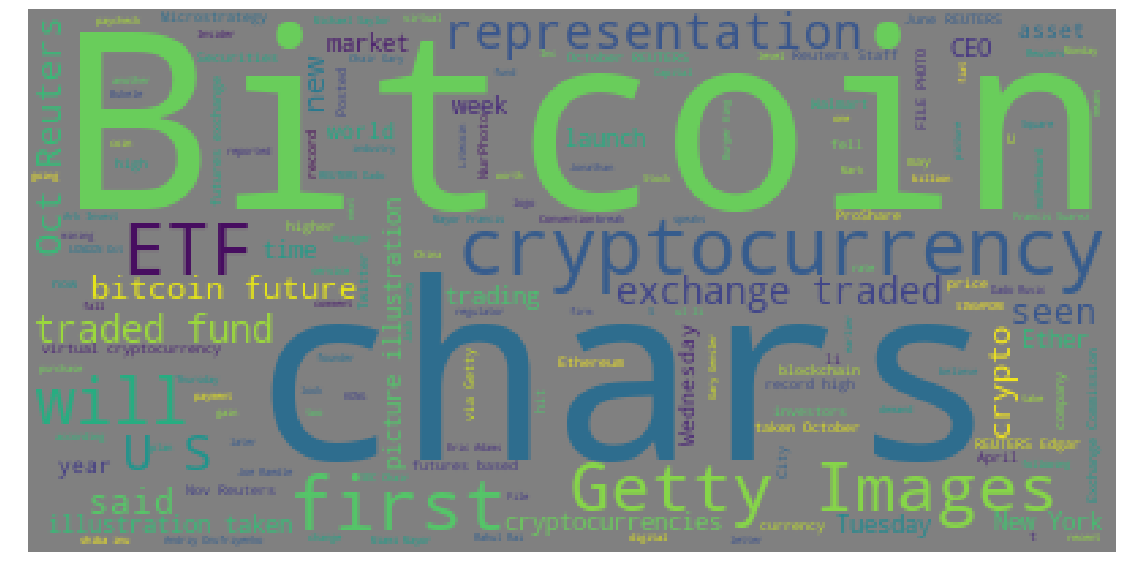

In [22]:
# Generate the Bitcoin word cloud
cloud_btc = WordCloud(background_color='grey').generate(Bitcoin_df['Text'].str.cat())
plt.axis("off")
plt.imshow(cloud_btc)
plt.show()

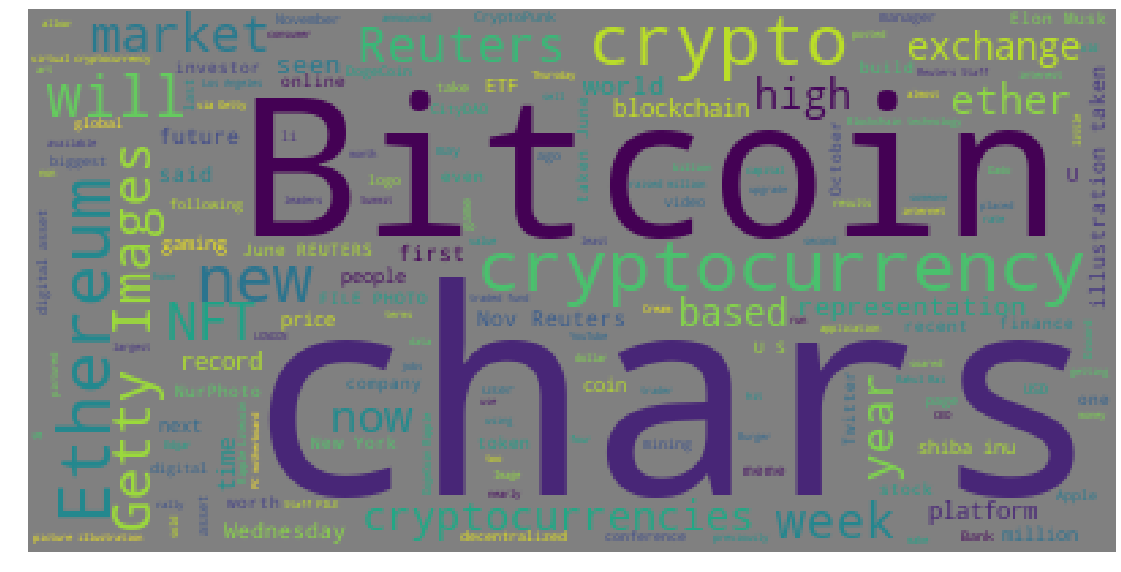

In [23]:
# Generate the Ethereum word cloud

cloud_eth = WordCloud(background_color='grey').generate(Ethereum_df['Text'].str.cat())
plt.axis("off")
plt.imshow(cloud_eth)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_bitcoin = Bitcoin_df['Text'].str.cat()

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_bitcoin)

# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [30]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
AMC ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
Reuters ORG
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares PERSON
2021 DATE
Marco Bello PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
ETF ORG
NurPhoto ORG
ETF ORG
>Bloomberg PERSON
first ORDINAL
ETF ORG
Rafael Henrique PERSON
Getty Images
 ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERC

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_ethereum = Ethereum_df['Text'].str.cat()

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_ethereum)

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [34]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

this year DATE
Australian Geoffrey Huntley ORG
AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
1-2% PERCENT
Ethereum GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Rahul Rai PERSON
nearly 20 CARDINAL
TB ORG
NFT ORG
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
Nov 8 DATE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
American Airlines ORG
Airbus ORG
A321-200 PRODUCT
Los Angeles International GPE
Los Angeles GPE
California GPE
U.S. GPE
March 28, 2018 DATE
REUTERS ORG
Mike Blake/File PERSON


---